In [0]:
import numpy as np
import csv
import json
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import matplotlib.pyplot as mlp
import pandas as pd
from pandas import DataFrame
from sqlalchemy import create_engine

In [90]:
spotify_ML = pd.read_csv("patrick_spotify_list.csv")
# spotify_song_list = spotify_ML[spotify_ML['song_popularity']>89]
spotify_ML.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
0,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,By The Way (Deluxe Version),00s Rock Anthems,Red Hot Chili Peppers - By The Way
1,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724,Infest,00s Rock Anthems,Papa Roach - Last Resort
2,81,269000,0.017900,0.618,0.938,0.000000,9,0.1670,-3.442,1,0.0456,91.455,4,0.875,By The Way (Deluxe Version),00s Rock Anthems,Red Hot Chili Peppers - Can't Stop
3,71,227240,0.001360,0.659,0.778,0.000007,11,0.0841,-6.423,1,0.0379,110.022,4,0.623,blink-182,00s Rock Anthems,blink-182 - I Miss You
4,62,256600,0.007010,0.370,0.944,0.000003,1,0.1350,-4.979,0,0.0767,130.315,4,0.345,Best Of You,00s Rock Anthems,Foo Fighters - Best of You


In [91]:
songs1 = spotify_ML.drop(['playlist','song_popularity','song_duration_ms',
                          'energy','instrumentalness','key','audio_mode','tempo','time_signature',
                          'audio_valence', 'album_names', 'Artist_and_Track_Name'], axis=1)
 
songs1.head()

,acousticness,danceability,liveness,loudness,speechiness
0,0.026400,0.451,0.1020,-4.938,0.1070
1,0.000504,0.581,0.2680,-3.659,0.0624
2,0.017900,0.618,0.1670,-3.442,0.0456
3,0.001360,0.659,0.0841,-6.423,0.0379
4,0.007010,0.370,0.1350,-4.979,0.0767


In [92]:
songs1.describe()

,acousticness,danceability,liveness,loudness,speechiness
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,0.170845,0.675608,0.190844,-6.391571,0.124985
std,0.214172,0.154222,0.153067,2.571563,0.111489
min,0.000004,0.130000,0.021500,-26.401000,0.023600
25%,0.019200,0.571500,0.094700,-7.832000,0.043400
50%,0.077600,0.686000,0.127000,-5.942000,0.071300
75%,0.246500,0.791000,0.249000,-4.541500,0.186500
max,0.994000,0.980000,0.922000,-0.737000,0.826000


In [0]:
from sklearn import preprocessing
loudness = songs1[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs1['loudness'] = pd.DataFrame(loudness_scaled)

In [0]:
songs_features = songs1.copy()

In [0]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

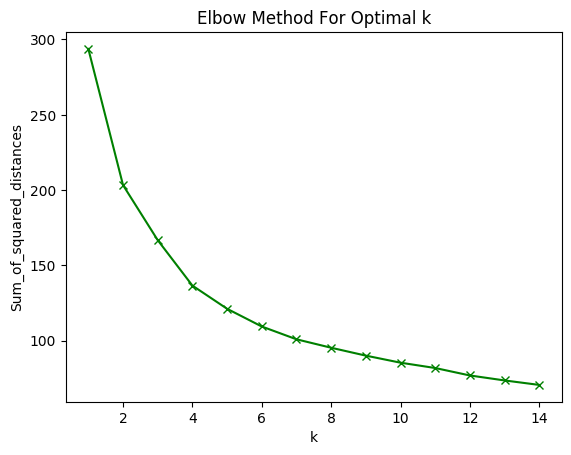

In [96]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [103]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

[[0.08983011 0.70251446 0.12507742 0.7877423  0.13175957]
 [0.58277616 0.60588078 0.15481849 0.70953395 0.08583431]
 [0.0965768  0.64589152 0.43084024 0.81064889 0.13500769]]


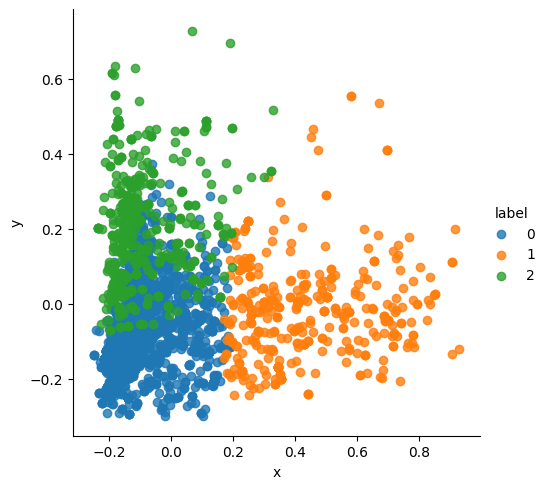

In [105]:
import seaborn as sns

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

centroids = kmeans.cluster_centers_
print(centroids)

In [106]:
pca.explained_variance_ratio_

array([0.42370923, 0.22239433])

In [107]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability  liveness  loudness  speechiness
PC-1      0.948639     -0.213998 -0.075219 -0.191782    -0.108857
PC-2     -0.111149     -0.714670  0.677200  0.052747    -0.124538


In [108]:
songs1['label'] = y_kmeans

# shuffle dataset

songs1 = songs1.sample(frac=1)
songs1['label'].value_counts()

0    1625
2     507
1     411
Name: label, dtype: int64

In [113]:
spotify_ML[songs1['label'] == 0].head()

#Chill and Dance/Energetic


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
0,74,216933,0.02640,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,By The Way (Deluxe Version),00s Rock Anthems,Red Hot Chili Peppers - By The Way
2,81,269000,0.01790,0.618,0.938,0.000000,9,0.1670,-3.442,1,0.0456,91.455,4,0.875,By The Way (Deluxe Version),00s Rock Anthems,Red Hot Chili Peppers - Can't Stop
3,71,227240,0.00136,0.659,0.778,0.000007,11,0.0841,-6.423,1,0.0379,110.022,4,0.623,blink-182,00s Rock Anthems,blink-182 - I Miss You
4,62,256600,0.00701,0.370,0.944,0.000003,1,0.1350,-4.979,0,0.0767,130.315,4,0.345,Best Of You,00s Rock Anthems,Foo Fighters - Best of You
5,77,187613,0.09380,0.567,0.795,0.000000,9,0.1140,-4.985,0,0.1340,170.060,4,0.635,A Fever You Can't Sweat Out,00s Rock Anthems,Panic! At The Disco - I Write Sins Not Tragedies


In [114]:
songs1[songs1['label'] == 0].mean()

acousticness    0.089830
danceability    0.702514
liveness        0.125077
loudness        0.787742
speechiness     0.131760
label           0.000000
dtype: float64

In [115]:

spotify_ML[songs1['label'] == 1].head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
6,79,232533,0.872,0.657,0.291,0.000000,2,0.114,-10.572,1,0.0293,103.973,4,0.298,All That We Needed,00s Rock Anthems,Plain White T's - Hey There Delilah
18,65,209573,0.921,0.471,0.179,0.000000,9,0.101,-10.273,1,0.0890,174.273,4,0.194,Sola,100% LatinX,Jessie Reyez - Sola
21,77,199095,0.398,0.751,0.579,0.000023,2,0.133,-4.036,1,0.0321,105.031,4,0.349,Havana (Remix),100% LatinX,Camila Cabello - Havana - Remix
45,77,288333,0.575,0.624,0.653,0.000000,8,0.104,-6.582,0,0.1760,73.884,4,0.565,Justified,2000s Smash Hits,Justin Timberlake - Cry Me a River
47,74,221360,0.407,0.530,0.422,0.000000,5,0.107,-6.262,1,0.0342,119.964,4,0.349,Bangerz (Deluxe Version),2000s Smash Hits,Miley Cyrus - Wrecking Ball


In [111]:
songs1[songs1['label'] == 1].mean()


acousticness    0.582776
danceability    0.605881
liveness        0.154818
loudness        0.709534
speechiness     0.085834
label           1.000000
dtype: float64

In [77]:
spotify_ML[songs1['label'] == 2].tail()

#Chill and Reflect

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
2533,63,235306,0.00931,0.786,0.689,0.000001,1,0.214,-6.113,1,0.3150,157.935,4,0.874,T-Pain Presents Happy Hour: The Greatest Hits,Workout Twerkout,T-Pain - Booty Wurk (One Cheek At a Time)
2534,66,231893,0.27200,0.763,0.530,0.000000,5,0.160,-5.554,0,0.0577,97.033,4,0.469,Up Down (Do This All Day),Workout Twerkout,T-Pain - Up Down (Do This All Day)
2535,57,220714,0.11800,0.818,0.675,0.000017,11,0.262,-4.176,1,0.0655,139.977,4,0.470,"Work Hard, Play Hard",Workout Twerkout,"Wiz Khalifa - Work Hard, Play Hard"
2536,62,260224,0.02560,0.892,0.460,0.000000,1,0.147,-7.814,1,0.0997,136.964,4,0.093,Culture II,Workout Twerkout,Migos - Beast
2541,89,201707,0.09560,0.708,0.648,0.000000,6,0.134,-5.626,1,0.0449,143.955,4,0.338,Love Lies (with Normani),Young & Free,Khalid - Love Lies (with Normani)


In [112]:
songs1[songs1['label'] == 2].mean()

acousticness    0.096577
danceability    0.645892
liveness        0.430840
loudness        0.810649
speechiness     0.135008
label           2.000000
dtype: float64

In [0]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
# Confusion matrix
definitions = ['Energetic','Aspiring Singer','Relaxed']



In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[167   2  11]
 [  1 133   5]
 [  3   3 515]]


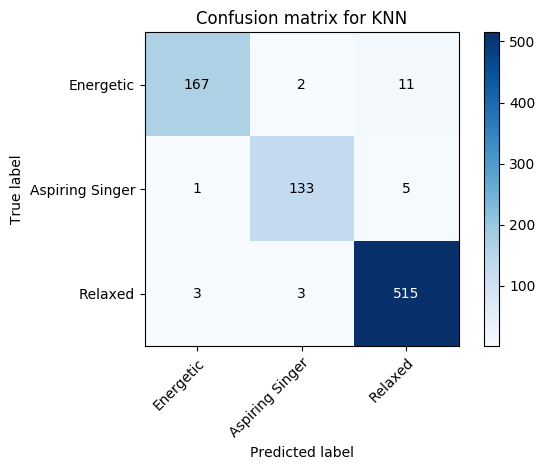

In [83]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [84]:

print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

                 precision    recall  f1-score   support

      Energetic       0.98      0.93      0.95       180
Aspiring Singer       0.96      0.96      0.96       139
        Relaxed       0.97      0.99      0.98       521

       accuracy                           0.97       840
      macro avg       0.97      0.96      0.96       840
   weighted avg       0.97      0.97      0.97       840
KNN
